In [4]:
import csv
import heapq
import matplotlib.pyplot as plt

In [5]:
# Load the maze from a CSV file
def load_maze(file_path):
    maze = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            maze.append([int(cell) for cell in row])
    return maze

In [6]:
# A* algorithm
def astar(maze, start, end):
    def heuristic(node):
        # Manhattan distance heuristic
        return abs(node[0] - end[0]) + abs(node[1] - end[1])

    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {pos: float('inf') for row in maze for pos in row}
    g_score[start] = 0

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == end:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            x, y = current[0] + neighbor[0], current[1] + neighbor[1]

            if 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] == 1:
                tentative_g_score = g_score[current] + 1

                if tentative_g_score < g_score.get((x, y), float('inf')):
                    came_from[(x, y)] = current
                    g_score[(x, y)] = tentative_g_score
                    heapq.heappush(open_set, (tentative_g_score + heuristic((x, y)), (x, y)))

    return None

In [7]:
# Define the start and end points
start = (0,0)
end = (19,39)

In [8]:
# Load the maze from the CSV file
maze = load_maze("E:\DataScience\Maze\maze.csv")

In [9]:
# Find the path using A*
path = astar(maze, start, end)

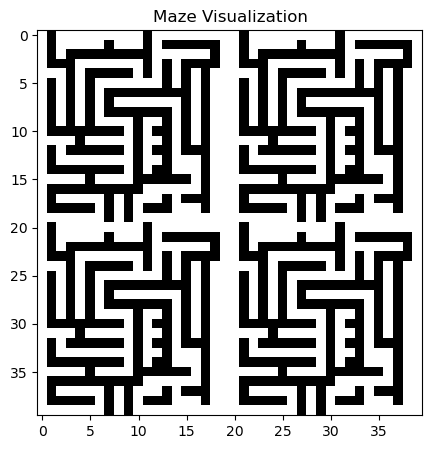

In [10]:
# Create a Matplotlib figure and axis for visualization
fig, ax = plt.subplots(figsize=(5, 5))

# Define a custom colormap for walls (0 as black) and paths (1 as white)
cmap = plt.cm.colors.ListedColormap(['black', 'white'])

# Display the maze using the custom colormap
ax.imshow(maze, cmap=cmap)

# Set a title for the plot
ax.set_title('Maze Visualization')

# Show the plot
plt.show()

Path found:
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
(10, 0)
(11, 0)
(12, 0)
(13, 0)
(14, 0)
(15, 0)
(16, 0)
(17, 0)
(18, 0)
(19, 0)
(19, 1)
(19, 2)
(19, 3)
(19, 4)
(19, 5)
(19, 6)
(20, 6)
(20, 7)
(20, 8)
(20, 9)
(20, 10)
(19, 10)
(19, 11)
(19, 12)
(19, 13)
(19, 14)
(19, 15)
(19, 16)
(19, 17)
(19, 18)
(19, 19)
(19, 20)
(19, 21)
(19, 22)
(19, 23)
(19, 24)
(19, 25)
(19, 26)
(20, 26)
(20, 27)
(20, 28)
(20, 29)
(20, 30)
(19, 30)
(19, 31)
(19, 32)
(19, 33)
(19, 34)
(19, 35)
(19, 36)
(19, 37)
(19, 38)
(19, 39)


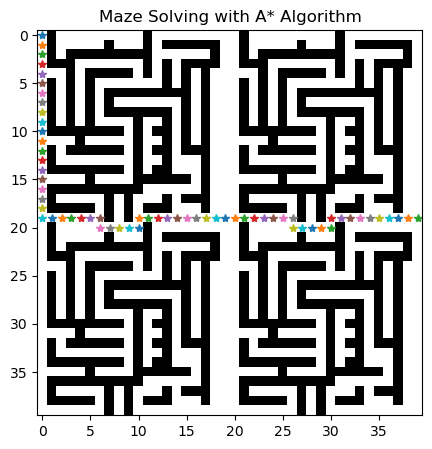

In [11]:
if path:
    print("Path found:")
    for p in path:
        print(p)
    fig, ax = plt.subplots(figsize=(5, 5))

    # Define a custom colormap for walls (0 as black) and paths (1 as white)
    cmap = plt.cm.colors.ListedColormap(['black', 'white'])

    ax.imshow(maze, cmap=cmap)

    for node in path:
        ax.plot(node[1], node[0], '*')

    ax.set_title('Maze Solving with A* Algorithm')
    plt.show()
else:
    print("No path found.")
